# Ecuaciones de una variable

In [1]:
#import some useful packages and some stylish
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from math import *
plt.style.use('seaborn')
#%matplotlib inline #ejecutar esta línea cuando se trabaje en un servidor jupyter
pd.set_option("display.precision", 10) #ejecutar esta línea para mejorar la presición de pandas más dígitos

In [1]:
## MÉTODOS
### Método de gráfico
#### Grafica de funciones
def graficar(f, x_i, x_f, int = 1000):
    fig, ax = plt.subplots()
    x = np.linspace(x_i, x_f, int)
    ax.plot(x, f(x))
    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()
    ax.grid(True, linestyle='-')
    ax.annotate("", xy=(xmax, 0), xytext=(xmin, 0),
                arrowprops=dict(color='gray', width=1.5, headwidth=8, headlength=10))
    ax.annotate("", xy=(0, ymax), xytext=(0, ymin),
                arrowprops=dict(color='gray', width=1.5, headwidth=8, headlength=10))
    plt.show()

### Método de bisección
#### Solucion aproximada para f(x)=0 en el intervalo [a,b] por el metodo de biseccion.
'''
---
#### Parametros de entrada

    f : funcion
        Funcion a la que se le intenta encontrar una solucion para la ecuacion f(x)=0.
    a,b : números
        Intervalo en el cual se desea buscar la solucion.
		Si f(a)*f(b) >= 0 el método no regresa ningún valor, la solución no esta garantizada.
    tol: tolerancia - número
	    Criterio de convergencia para el valor aproximado de x en f(x).
    N : máximo número de iteraciones
---
#### Parametros de salida
    tabla: Dataframe con los datos de las iteraciones
    c_n : Numero
        Este el el valor medio del N-esimo intervalo calculado en el metodo de bissecion.
		El intervalo inicial [a_0,b_0] es dado por [a,b]. Si f(m_n) == 0 para algún valor
		medio m_n = (a_n + b_n)/2, entonces la funcion regresa esa solución. Si todos los
		signos de los valores de f(a_n), f(b_n) y f(m_n) son iguales en cualquier iteracion,
		entonces el metodo de biseccion falla y no devuelve nada.
'''
def met_biseccion(f, a, b, tol, N=100):
    if f(a) * f(b) > 0:  # intevarlo fallido
        print("El metodo de bisección falló.")
        return None,None #fin de la función
    n = 0
    c_n = (a + b) / 2.0  # punto medio
    a_n = a
    b_n = b
    error_abs = abs(b_n - a_n)
    lista=[[n, a_n, b_n, c_n, f(c_n), error_abs]] #agrega el dato a la lista
    while error_abs > tol and n <= N-1 and f(c_n)!=0:
        if f(a_n) * f(c_n) < 0:
            b_n = c_n
        else:
            a_n = c_n
        error_abs = abs(b_n - a_n)
        c_n = (a_n + b_n) / 2.0
        n += 1
        lista.append([n,a_n, b_n, c_n, f(c_n),error_abs])
    tabla = pd.DataFrame(lista, columns=['n','a_n', 'b_n', 'c_n', 'f(c_n)', 'error_abs']).set_index('n')
    return tabla, c_n

### Método de _regula falsi_
#### Solucion aproximada para f(x)=0 en el intervalo [a,b] por el metodo de la posición falsa.
'''
---
### Parametros de entrada

    f : funcion
        Funcion a la que se le intenta encontrar una solucion para la ecuacion f(x)=0.
    a,b : números
        Intervalo en el cual se desea buscar la solucion.
		f(a)*f(b) >= 0 el método no regresa ningún valor, la solución no esta garantizada.
    tol: tolerancia
	    Criterio de convergencia para el valor aproximado de x en f(x).
    N : máximo número de iteraciones
---
### Parametros de salida
    tabla: Dataframe con los datos de las iteraciones
    c_n : Numero
        Este el el valor donde corta la recta que pasa por los puntos (a,f(a)) y (b,f(b))
'''
def met_regulafalsi(f, a, b, tol, N=100):
    if f(a) * f(b) > 0:  # intevarlo fallido
        print("El metodo de bisección falló.")
        return None,None #fin de la función
    n = 0
    c_n = b-(f(b)*(b-a))/(f(b)-f(a)) # falsa posición
    a_n = a
    b_n = b
    error_rel = 1
    lista=[[n, a_n, b_n, c_n, f(c_n), error_rel]] #agrega el dato a la lista
    while error_rel > tol and n <= N-1 and f(c_n)!=0:
        if f(a_n) * f(c_n) < 0:
            b_n = c_n
        else:
            a_n = c_n
        c_o = c_n
        c_n = b_n-(f(b_n)*(b_n-a_n))/(f(b_n)-f(a_n))
        error_rel = abs((c_o - c_n)/c_n)
        n += 1
        lista.append([n,a_n, b_n, c_n, f(c_n),error_rel])
    tabla = pd.DataFrame(lista, columns=['n','a_n', 'b_n', 'c_n', 'f(c_n)',
                                         'error_abs']).set_index('n')
    return tabla, c_n
#---
def met_merge_b_rf(f, a_n, b_n, tol, n = 100):
    if f(a_n) * f(b_n) > 0:
        print("El metodo de proporcion falló.")
        return None, None
    n_n = 0
    c_n_b = (a_n + b_n) / 2
    c_n_rf = a_n - ((f(a_n) * (b_n - a_n)) / (f(b_n) - f(a_n)))
    toggle = None
    c_n = None
    error_abs = None

    if abs(f(c_n_b)) > abs(f(c_n_rf)):
        toggle = False
        c_n = c_n_rf
        error_abs = 1
        print('Regula falsi:', f'N={n_n},', f'A={a_n},', f'B={b_n},', f'C={c_n}')
    else:
        toggle = True
        c_n = c_n_b
        error_abs = abs(a_n - b_n)
        print('Bisección:', f'N={n_n},', f'A={a_n},', f'B={b_n},', f'C={c_n}')

    lista = [[n_n, a_n, b_n, c_n, f(c_n), error_abs]]

    while error_abs > tol and f(c_n) != 0 and n_n < n:
        if f(a_n) * f(c_n) <= 0:
            b_n = c_n
        elif f(c_n) * f(b_n) <= 0:
            a_n = c_n

        n_n += 1
        c_n_b = (a_n + b_n) / 2
        c_n_rf = a_n - ((f(a_n) * (b_n - a_n)) / (f(b_n) - f(a_n)))
        lista.append([n_n, a_n, b_n, c_n, f(c_n), error_abs])

        if abs(f(c_n_b)) > abs(f(c_n_rf)):
            toggle = False
            c_o = c_n
            c_n = c_n_rf
            error_abs = abs(c_o - c_n)
            print('Regula falsi:', f'N={n_n},', f'A={a_n},', f'B={b_n},', f'C={c_n}')
        else:
            toggle = True
            c_n = c_n_b
            error_abs = abs(a_n - b_n)
            print('Bisección:', f'N={n_n},', f'A={a_n},', f'B={b_n},', f'C={c_n}')

    tabla = pd.DataFrame(lista, columns=['$n$','$a_n$', '$b_n$', '$c_n$', '$f(c_n)$', '$\epsilon_{abs}$']).set_index('$n$')
    return tabla, c_n
#---
def met_regulafalsi_mod(f, a, b, tol, mod, N=100):
    if f(a) * f(b) >= 0:  # intevarlo fallido
            print("El metodo de 'regula falsi' falló.")
            return None
    n = 0
    a_n = a
    b_n = b
    c_n = a - (f(a)*(b-a)) / (f(b)-f(a))
    error_relativo =abs((a_n - c_n) / c_n)
    p = 0
    q = 0
    lista = [[n, a_n, b_n, c_n, f(c_n), error_relativo*100]]
    while error_relativo > tol and f(c_n) != 0 and n < N:
        c_old = c_n #antiguo
        if f(c_n) == 0:
            print("La solucion exacta fue encontrada: c_n={0:.16f}".format(c_n))
            return None, c_n
        if p == mod:
            c_n = (a_n + b_n) / 2.0
            p = 0
        if q == mod:
            c_n = (a_n + b_n) / 2.0
            q = 0
        if f(a_n) * f(c_n) < 0:
            b_n = c_n
            p += 1
        else:
            a_n = c_n
            q += 1
        c_n = a_n - (f(a_n)*(b_n-a_n)) / (f(b_n)-f(a_n)) #nuevo
        error_relativo = abs((c_old - c_n) / c_n)
        n += 1
        lista.append([n, a_n, b_n, c_n, f(c_n), error_relativo*100])
    tabla = pd.DataFrame(lista, columns=['n','a_n', 'b_n', 'c_n', 'f(c_n)',
                                         'error_relativo']).set_index('n')
    return tabla , c_n
### Método de Newton-Rapshon
#### Solucion aproximada para f(x)=0 por el método Newton-Rapshon.
'''
---
### Parametros de entrada

    f : funcion
        Funcion a la que se le intenta encontrar una solucion para la ecuacion f(x)=0.
    df : derivada de la función
    a : número inicial
    tol: tolerancia
	    Criterio de convergencia para el valor aproximado de x en f(x)
    N : máximo número de iteraciones
---
### Parametros de salida
    tabla: Dataframe con los datos de las iteraciones
    c_n : Número
'''
def met_newton_rapshon(f, df, a, tol, N=100):
    if df(a) == 0:  # fallo
        print("El metodo de falló.")
        return None,None # fin de la función
    n = 1
    a_n = a - (f(a))/(df(a)) # recta tangente
    error = abs(a - a_n)
    lista=[[n, a, a_n, f(a_n), error]] #agrega el dato a la lista
    while error > tol and n <= N-1 and f(a_n)!=0:
        a_0 = a_n
        if df(a_n) == 0:  # fallo
            print("El metodo de falló.")
            return None,None
        a_n = a_0 - (f(a_0))/(df(a_0))
        error = abs(a_0 - a_n)
        n += 1
        lista.append([n, a_0, a_n, f(a_n), error])

    tabla = pd.DataFrame(lista, columns=['n','a_n-1', 'a_n', 'f(a_n)',
                                         'error_abs']).set_index('n')
    return tabla, a_n

### Método de la secante
#### Solucion aproximada para f(x)=0 por el método Newton-Rapshon.
'''
---
### Parametros de entrada

    f : funcion
        Funcion a la que se le intenta encontrar una solucion para la ecuacion f(x)=0.
    x_0, x_1 : números iniciales
    tol: tolerancia
	    Criterio de convergencia para el valor aproximado de x en f(x)
    N : máximo número de iteraciones
---
### Parametros de salida
    tabla: Dataframe con los datos de las iteraciones
    c_n : Número
'''
def met_secante(f, x_0, x_1, tol, N=100):
    if f(x_0) - f(x_1) == 0:  # fallo
        print("El metodo de falló.")
        return None,None # fin de la función
    n = 2
    x_n = x_1 - (f(x_1)*(x_1 - x_0))/(f(x_1) - f(x_0)) # recta secante
    error = abs(x_n - x_1)
    #agrega los primeros datos a la lista
    lista=[[0, x_0, f(x_0), None], [1, x_1, f(x_1), None], [2, x_n, f(x_n), error]]
    while error > tol and n <= N-1 and f(x_n)!=0:
        x_0 = x_1
        x_1 = x_n
        if f(x_0) - f(x_1) == 0:  # fallo
            print("El metodo de falló.")
            return None,None # fin de la función
        x_n = x_1 - (f(x_1)*(x_1 - x_0))/(f(x_1) - f(x_0)) # recta secante
        error = abs(x_n - x_1)
        n += 1
        lista.append([n, x_n, f(x_n), error])

    tabla = pd.DataFrame(lista, columns=['n','x_n', 'f(x_n)',
                                         'error']).set_index('n')
    return tabla, x_n

### Ejemplos

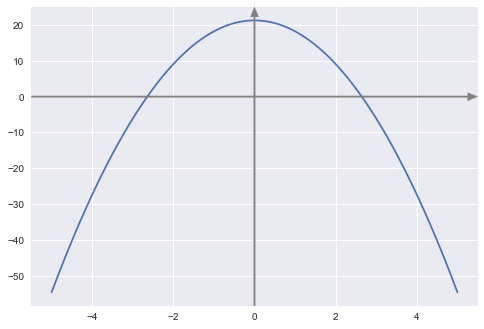

-2.643810272216797


a_n           b_n           c_n        f(c_n)     error_abs
n                                                                       
1  -4.0000000000  0.0000000000 -2.0000000000  9.1028593611  4.0000000000
2  -4.0000000000 -2.0000000000 -3.0000000000 -6.1144674596  2.0000000000
3  -3.0000000000 -2.0000000000 -2.5000000000  2.2511964988  1.0000000000
4  -3.0000000000 -2.5000000000 -2.7500000000 -1.7426625211  0.5000000000
5  -2.7500000000 -2.5000000000 -2.6250000000  0.3015461811  0.2500000000
6  -2.7500000000 -2.6250000000 -2.6875000000 -0.7087427919  0.1250000000
7  -2.6875000000 -2.6250000000 -2.6562500000 -0.2006439035  0.0625000000
8  -2.6562500000 -2.6250000000 -2.6406250000  0.0511898085  0.0312500000
9  -2.6562500000 -2.6406250000 -2.6484375000 -0.0745423887  0.0156250000
10 -2.6484375000 -2.6406250000 -2.6445312500 -0.0116301243  0.0078125000
11 -2.6445312500 -2.6406250000 -2.6425781250  0.0197913837  0.0039062500
12 -2.6445312500 -2.6425781250 -2.6435546875  0.0040835151  0.0019531250
13 -2.6445312500 -2.6435546875 -2.6440429688 -0.0037725833  0.0009765625
14 -2.6440429688 -2.6435546875 -2.6437988281  0.0001556462  0.0004882812
15 -2.6440429688 -2.6437988281 -2.6439208984 -0.0018084234  0.0002441406
16 -2.6439208984 -2.6437988281 -2.6438598633 -0.0008263773  0.0001220703
17 -2.6438598633 -2.6437988281 -2.6438293457 -0.0003353627  0.0000610352
18 -2.6438293457 -2.6437988281 -2.6438140869 -0.0000898575  0.0000305176
19 -2.6438140869 -2.6437988281 -2.6438064575  0.0000328945  0.0000152588
20 -2.6438140869 -2.6438064575 -2.6438102722 -0.0000284815  0.0000076294

In [3]:
#### Ejemplo
def f(x):
    return 1.3 * (np.cos(0.2 * x))**2 + 20 - 3 * x**2
graficar(f,-5,5)
tabla, c_n = met_biseccion(f,-4,0,1e-5)
print(c_n)
tabla

#### Ejemplo
Utilice el método de bisección para obterner $c_5$, con $f(x)=e^{-x-0.7}-x-0.7$, en el intervalo $[-1, 1]$

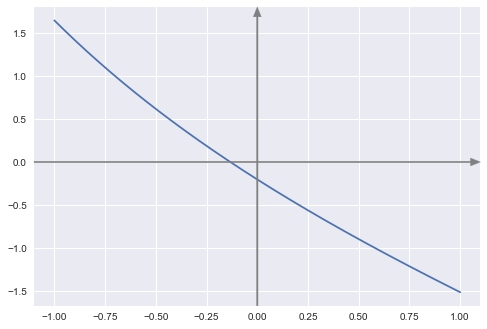

-0.132843017578125


a_n        b_n           c_n        f(c_n)     error_abs
n                                                                    
1  -1.0000000000  1.0000000  0.0000000000 -0.2034146962  2.0000000000
2  -1.0000000000  0.0000000 -0.5000000000  0.6187307531  1.0000000000
3  -0.5000000000  0.0000000 -0.2500000000  0.1876281516  0.5000000000
4  -0.2500000000  0.0000000 -0.1250000000 -0.0122951312  0.2500000000
5  -0.2500000000 -0.1250000 -0.1875000000  0.0864962149  0.1250000000
6  -0.1875000000 -0.1250000 -0.1562500000  0.0368170388  0.0625000000
7  -0.1562500000 -0.1250000 -0.1406250000  0.0121911811  0.0312500000
8  -0.1406250000 -0.1250000 -0.1328125000 -0.0000692822  0.0156250000
9  -0.1406250000 -0.1328125 -0.1367187500  0.0060566057  0.0078125000
10 -0.1367187500 -0.1328125 -0.1347656250  0.0029925780  0.0039062500
11 -0.1347656250 -0.1328125 -0.1337890625  0.0014613772  0.0019531250
12 -0.1337890625 -0.1328125 -0.1333007812  0.0006959799  0.0009765625
13 -0.1333007812 -0.1328125 -0.1330566406  0.0003133319  0.0004882812
14 -0.1330566406 -0.1328125 -0.1329345703  0.0001220206  0.0002441406
15 -0.1329345703 -0.1328125 -0.1328735352  0.0000263682  0.0001220703
16 -0.1328735352 -0.1328125 -0.1328430176 -0.0000214573  0.0000610352

In [4]:
def f(x):
    return e**(-x-0.7)-x-0.7
graficar(f,-1,1)
tabla, c_n = met_biseccion(f,-1,1,1e-4,20)
print(c_n)
tabla

#### Ejemplo
Utilice el método de bisección para la función $f(x)=\frac{1}{x}$, con una precisión de $10^{-7}$, en el intervalo $[-1,1]$, ¿qué sucede?

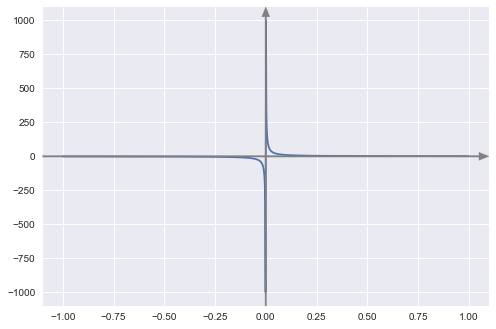

In [5]:
def f(x):
    return 1/x
graficar(f,-1,1)
# met_biseccion(f,-1,1,1e-4) falla porque cunado x = 0, la función no está deficida, es decir, f no es continua en el intervalo

#### Ejemplo
Utilizar el método de la posición falsa para encontrar la raíz de la función, $x \ln(x+1) -2$ en $[0,3]$ con un margen de error de $10^{-6}$

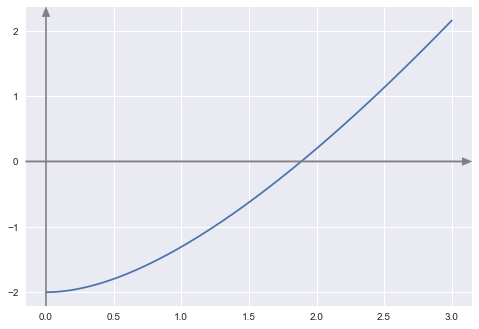

1.886620957115325


a_n  b_n           c_n        f(c_n)     error_abs
n                                                             
1  0.0000000000    3  1.4426950409 -0.7115262389  1.0000000000
2  1.4426950409    3  1.8287247725 -0.0984444352  0.2110923073
3  1.8287247725    3  1.8798053213 -0.0116872494  0.0271733185
4  1.8798053213    3  1.8858369132 -0.0013618478  0.0031983635
5  1.8858369132    3  1.8865392968 -0.0001583424  0.0003723132
6  1.8865392968    3  1.8866209571 -0.0000184059  0.0000432839

In [6]:
def f(x):
    return x * np.log(x + 1) - 2
graficar(f, 0, 3)
tabla, c_n = met_regulafalsi(f, 0, 3, 1e-4)
print(c_n)
tabla


#### Ejemplo

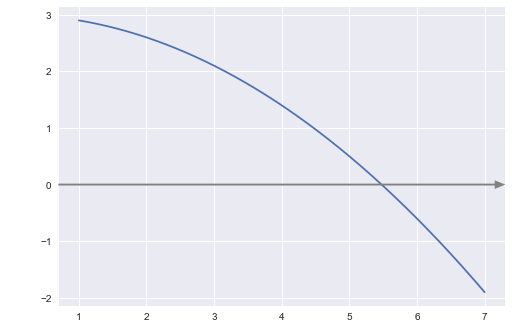

5.47722252130301


a_n  b_n           c_n        f(c_n)     error_abs
n                                                             
1  1.0000000000    7  4.6250000000  0.8609375000  1.0000000000
2  4.6250000000    7  5.3655913978  0.1210428951  0.1380260521
3  5.3655913978    7  5.4634782609  0.0150405293  0.0179165832
4  5.4634782609    7  5.4755459429  0.0018396627  0.0022039231
5  5.4755459429    7  5.4770205579  0.0002245808  0.0002692367
6  5.4770205579    7  5.4772005535  0.0000274097  0.0000328627
7  5.4772005535    7  5.4772225213  0.0000033452  0.0000040108

In [7]:
def f(x):
    return -x**2/10 + 3
graficar(f,1,7)
tabla, c_n = met_regulafalsi(f,1,7,1e-5)
print(c_n)
tabla

In [8]:
tabla, c_n = met_biseccion(f,1,7,1e-5)
print(c_n)
tabla


5.4772233963012695


a_n           b_n           c_n        f(c_n)     error_abs
n                                                                       
1   1.0000000000  7.0000000000  4.0000000000  1.4000000000  6.0000000000
2   4.0000000000  7.0000000000  5.5000000000 -0.0250000000  3.0000000000
3   4.0000000000  5.5000000000  4.7500000000  0.7437500000  1.5000000000
4   4.7500000000  5.5000000000  5.1250000000  0.3734375000  0.7500000000
5   5.1250000000  5.5000000000  5.3125000000  0.1777343750  0.3750000000
6   5.3125000000  5.5000000000  5.4062500000  0.0772460937  0.1875000000
7   5.4062500000  5.5000000000  5.4531250000  0.0263427734  0.0937500000
8   5.4531250000  5.5000000000  5.4765625000  0.0007263184  0.0468750000
9   5.4765625000  5.5000000000  5.4882812500 -0.0121231079  0.0234375000
10  5.4765625000  5.4882812500  5.4824218750 -0.0056949615  0.0117187500
11  5.4765625000  5.4824218750  5.4794921875 -0.0024834633  0.0058593750
12  5.4765625000  5.4794921875  5.4780273438 -0.0008783579  0.0029296875
13  5.4765625000  5.4780273438  5.4772949219 -0.0000759661  0.0014648438
14  5.4765625000  5.4772949219  5.4769287109  0.0003251895  0.0007324219
15  5.4769287109  5.4772949219  5.4771118164  0.0001246151  0.0003662109
16  5.4771118164  5.4772949219  5.4772033691  0.0000243253  0.0001831055
17  5.4772033691  5.4772949219  5.4772491455 -0.0000258202  0.0000915527
18  5.4772033691  5.4772491455  5.4772262573 -0.0000007474  0.0000457764
19  5.4772033691  5.4772262573  5.4772148132  0.0000117890  0.0000228882
20  5.4772148132  5.4772262573  5.4772205353  0.0000055208  0.0000114441
21  5.4772205353  5.4772262573  5.4772233963  0.0000023867  0.0000057220

#### Ejemplo
En este ejemplo miramos que la convergencia del método de la falsa posición no siempre es la mejor.

Sea $f(x) = x^{10} - 1$

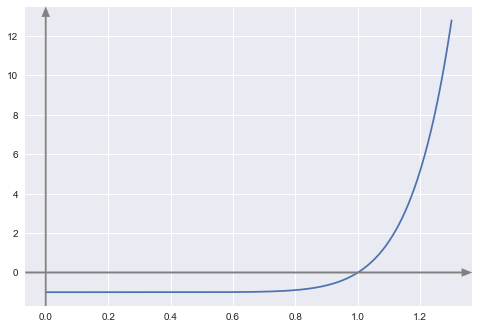

In [9]:
def f(x):
    return x**10 -1
graficar(f, 0, 1.3)

In [10]:
tabla, c_n = met_biseccion(f,0.1,2,1e-14)
print(c_n)
tabla

1.0000000000000022


a_n           b_n           c_n            f(c_n)  \
n                                                                
1   0.1000000000  2.0000000000  1.0500000000  6.2889462678e-01   
2   0.1000000000  1.0500000000  0.5750000000 -9.9604926002e-01   
3   0.5750000000  1.0500000000  0.8125000000 -8.7461843207e-01   
4   0.8125000000  1.0500000000  0.9312500000 -5.0947306733e-01   
5   0.9312500000  1.0500000000  0.9906250000 -8.9892194736e-02   
6   0.9906250000  1.0500000000  1.0203125000  2.2273423737e-01   
7   0.9906250000  1.0203125000  1.0054687500  5.6053140884e-02   
8   0.9906250000  1.0054687500  0.9980468750 -1.9360479644e-02   
9   0.9980468750  1.0054687500  1.0017578125  1.7717824501e-02   
10  0.9980468750  1.0017578125  0.9999023438 -9.7613345830e-04   
11  0.9999023438  1.0017578125  1.0008300781  8.3318563198e-03   
12  0.9999023438  1.0008300781  1.0003662109  3.6681502426e-03   
13  0.9999023438  1.0003662109  1.0001342773  1.3435850963e-03   
14  0.9999023438  1.0001342773  1.0000183105  1.8312055691e-04   
15  0.9999023438  1.0000183105  0.9999603271 -3.9665769603e-04   
16  0.9999603271  1.0000183105  0.9999893188 -1.0680638967e-04   
17  0.9999893188  1.0000183105  1.0000038147  3.8147627501e-05   
18  0.9999893188  1.0000038147  0.9999965668 -3.4331744977e-05   
19  0.9999965668  1.0000038147  1.0000001907  1.9073502717e-06   
20  0.9999965668  1.0000001907  0.9999983788 -1.6212345098e-05   
21  0.9999983788  1.0000001907  0.9999992847 -7.1525343492e-06   
22  0.9999992847  1.0000001907  0.9999997377 -2.6226012730e-06   
23  0.9999997377  1.0000001907  0.9999999642 -3.5762780981e-07   
24  0.9999999642  1.0000001907  1.0000000775  7.7486065497e-07   
25  0.9999999642  1.0000000775  1.0000000209  2.0861627714e-07   
26  0.9999999642  1.0000000209  0.9999999925 -7.4505802417e-08   
27  0.9999999925  1.0000000209  1.0000000067  6.7055227815e-08   
28  0.9999999925  1.0000000067  0.9999999996 -3.7252889662e-09   
29  0.9999999996  1.0000000067  1.0000000032  3.1664968869e-08   
30  0.9999999996  1.0000000032  1.0000000014  1.3969838619e-08   
31  0.9999999996  1.0000000014  1.0000000005  5.1222759367e-09   
32  0.9999999996  1.0000000005  1.0000000001  6.9849459550e-10   
33  0.9999999996  1.0000000001  0.9999999998 -1.5133971853e-09   
34  0.9999999998  1.0000000001  1.0000000000 -4.0745185004e-10   
35  1.0000000000  1.0000000001  1.0000000000  1.4552137273e-10   
36  1.0000000000  1.0000000000  1.0000000000 -1.3096523865e-10   
37  1.0000000000  1.0000000000  1.0000000000  7.2786221494e-12   
38  1.0000000000  1.0000000000  1.0000000000 -6.1843863364e-11   
39  1.0000000000  1.0000000000  1.0000000000 -2.7282620607e-11   
40  1.0000000000  1.0000000000  1.0000000000 -1.0001999229e-11   
41  1.0000000000  1.0000000000  1.0000000000 -1.3611334282e-12   
42  1.0000000000  1.0000000000  1.0000000000  2.9576341376e-12   
43  1.0000000000  1.0000000000  1.0000000000  7.9936057773e-13   
44  1.0000000000  1.0000000000  1.0000000000 -2.8088642523e-13   
45  1.0000000000  1.0000000000  1.0000000000  2.5979218776e-13   
46  1.0000000000  1.0000000000  1.0000000000 -1.1102230246e-14   
47  1.0000000000  1.0000000000  1.0000000000  1.2434497876e-13   
48  1.0000000000  1.0000000000  1.0000000000  5.7731597281e-14   
49  1.0000000000  1.0000000000  1.0000000000  2.2204460493e-14   

           error_abs  
n                     
1   1.9000000000e+00  
2   9.5000000000e-01  
3   4.7500000000e-01  
4   2.3750000000e-01  
5   1.1875000000e-01  
6   5.9375000000e-02  
7   2.9687500000e-02  
8   1.4843750000e-02  
9   7.4218750000e-03  
10  3.7109375000e-03  
11  1.8554687500e-03  
12  9.2773437500e-04  
13  4.6386718750e-04  
14  2.3193359375e-04  
15  1.1596679688e-04  
16  5.7983398438e-05  
17  2.8991699219e-05  
18  1.4495849609e-05  
19  7.2479248048e-06  
20  3.6239624024e-06  
21  1.8119812012e-06  
22  9.0599060054e-07  
23  4.5299530027e-07  
24  2.2649765019e-07  
25  1.1324882521e-07  
26  5.6624412492e-08  
27

In [11]:
tabla, c_n = met_regulafalsi(f,0.1,2,1e-14,1000)
print(c_n)
tabla

0.9974166589600537


a_n  b_n           c_n        f(c_n)     error_abs
n                                                                
1     0.1000000000    2  0.1018554687 -0.9999999999  1.0000000000
2     0.1018554687    2  0.1037091255 -0.9999999999  0.0178736129
3     0.1037091255    2  0.1055609721 -0.9999999998  0.0175429093
4     0.1055609721    2  0.1074110102 -0.9999999998  0.0172239150
5     0.1074110102    2  0.1092592416 -0.9999999998  0.0169160193
...            ...  ...           ...           ...           ...
996   0.9972878500    2  0.9973141108 -0.0265365757  0.0000263316
997   0.9973141108    2  0.9973401198 -0.0262826764  0.0000260783
998   0.9973401198    2  0.9973658792 -0.0260311541  0.0000258275
999   0.9973658792    2  0.9973913915 -0.0257819875  0.0000255790
1000  0.9973913915    2  0.9974166590 -0.0255351556  0.0000253329

[1000 rows x 5 columns]

Ahora, mejoramos la convergencia de los métodos bisección y falsa posición
$f(x) = x^{10} - 1$

In [12]:
def f(x):
    return x**10 -1
tabla, c_n = met_regulafalsi_mod(f,0,1.3,1e-10,2)
print(c_n)
tabla

0.9999999999998991


a_n           b_n           c_n            f(c_n)  error_relativo
n                                                                             
1   0.0000000000  1.3000000000  0.0942995954 -9.9999999994e-01  100.0000000000
2   0.0942995954  1.3000000000  0.1817588725 -9.9999996065e-01   48.1182986748
3   0.1817588725  1.3000000000  0.2628740125 -9.9999842429e-01   30.8570403075
4   0.7408794363  1.3000000000  0.7795558900 -9.1711564306e-01   66.2790037383
5   0.7795558900  1.3000000000  0.8143883106 -8.7167380608e-01    4.2771267916
6   0.7795558900  1.0397779450  0.9507316910 -3.9663556691e-01   14.3408894077
7   0.9507316910  1.0397779450  0.9911551864 -8.5009514375e-02    4.0784224242
8   0.9911551864  1.0397779450  0.9985087254 -1.4813067169e-02    0.7364521599
9   0.9911551864  1.0154665657  0.9993924564 -6.0588526493e-03    0.0884268236
10  0.9911551864  1.0033108760  0.9998669098 -1.3301048342e-03    0.0474516558
11  0.9998669098  1.0033108760  0.9999980286 -1.9713450459e-05    0.0131119060
12  0.9999980286  1.0033108760  0.9999999708 -2.9193333029e-07    0.0001942169
13  0.9999980286  1.0016544523  0.9999999854 -1.4632435297e-07    0.0000014561
14  0.9999980286  1.0008262405  0.9999999927 -7.3186158023e-08    0.0000007314
15  0.9999999927  1.0008262405  1.0000000000 -2.7170043992e-10    0.0000007291
16  1.0000000000  1.0008262405  1.0000000000 -1.0091927294e-12    0.0000000027

#### Ejemplo
En este ejemplo probamos el método de Newton-Rapshon.
Encontrar la raíz de la función $f(x) = x^{10} - 1$

In [13]:
def f(x):
    return x**10 - 1
def df(x):
    return 10 * x**9
tabla, c_n = met_newton_rapshon(f, df, 0.4, 1e-10)
print(c_n)
tabla

1.0


a_n-1             a_n            f(a_n)       error_abs
n                                                                   
1     0.4000000000  381.8297265625  6.5871471421e+25  381.4297265625
2   381.8297265625  343.6467539062  2.2967961902e+25   38.1829726562
3   343.6467539062  309.2820785156  8.0084331283e+24   34.3646753906
4   309.2820785156  278.3538706641  2.7923679708e+24   30.9282078516
5   278.3538706641  250.5184835977  9.7363850825e+23   27.8353870664
..             ...             ...               ...             ...
58    1.0823273539    1.0231596733  2.5728619174e-01    0.0591676805
59    1.0231596733    1.0022221288  2.2444813756e-02    0.0209375445
60    1.0022221288    1.0000220405  2.2042693574e-04    0.0022000883
61    1.0000220405    1.0000000022  2.1858513000e-08    0.0000220383
62    1.0000000022    1.0000000000  0.0000000000e+00    0.0000000022

[62 rows x 4 columns]

#### Ejercicios de la cartilla
2. (b) Use el método de Newton para obtener una aproximación de las soluciones del siguente problema, con una precisión de $10^{-7}$.

$3x^2 + \ln(x)(2x+\ln(x)) = 2x^2$, en $(0,1]$

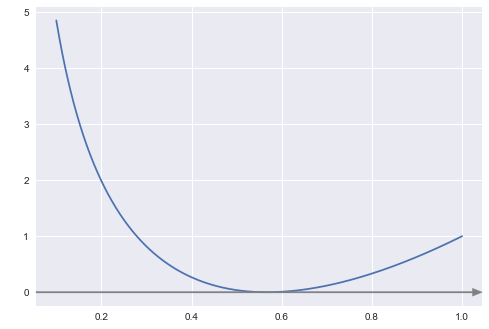

In [14]:
def f(x):
    return x**2 + np.log(x)*(2*x+np.log(x))
def df(x):
    return (2*(x+1)*(x+np.log(x)))/x
graficar(f,0.1,1)

In [15]:
tabla , c_n =met_newton_rapshon(f, df, 0.4, 1e-10)
print(c_n)
tabla

0.5671432889718685


a_n-1           a_n            f(a_n)     error_abs
n                                                             
1   0.4000000000  0.4737558188  7.4696946544e-02  0.0737558188
2   0.4737558188  0.5176847315  1.9797648563e-02  0.0439289126
3   0.5176847315  0.5416819331  5.0971540673e-03  0.0239972016
4   0.5416819331  0.5542244141  1.2932065025e-03  0.0125424810
5   0.5542244141  0.5606361536  3.2569412668e-04  0.0064117395
6   0.5606361536  0.5638777162  8.1724313830e-05  0.0032415625
7   0.5638777162  0.5655074917  2.0468783181e-05  0.0016297755
8   0.5655074917  0.5663246369  5.1219155534e-06  0.0008171452
9   0.5663246369  0.5667337749  1.2810692743e-06  0.0004091381
10  0.5667337749  0.5669384855  3.2034114283e-07  0.0002047105
11  0.5669384855  0.5670408761  8.0094515353e-08  0.0001023907
12  0.5670408761  0.5670920803  2.0024782665e-08  0.0000512042
13  0.5670920803  0.5671176846  5.0063398982e-09  0.0000256043
14  0.5671176846  0.5671304873  1.2516029879e-09  0.0000128027
15  0.5671304873  0.5671368888  3.1290303681e-10  0.0000064015
16  0.5671368888  0.5671400896  7.8225981248e-11  0.0000032008
17  0.5671400896  0.5671416900  1.9556578579e-11  0.0000016004
18  0.5671416900  0.5671424902  4.8891446447e-12  0.0000008002
19  0.5671424902  0.5671428903  1.2223000390e-12  0.0000004001
20  0.5671428903  0.5671430904  3.0558888753e-13  0.0000002001
21  0.5671430904  0.5671431904  7.6383344094e-14  0.0000001000
22  0.5671431904  0.5671432404  1.9095836024e-14  0.0000000500
23  0.5671432404  0.5671432654  4.7739590059e-15  0.0000000250
24  0.5671432654  0.5671432779  1.1657341759e-15  0.0000000125
25  0.5671432779  0.5671432840  2.7755575616e-16  0.0000000061
26  0.5671432840  0.5671432869  1.1102230246e-16  0.0000000029
27  0.5671432869  0.5671432890  0.0000000000e+00  0.0000000021

#### Ejemplos

In [16]:
def f(x):
    return x**(2) + np.log(x)*(2*x+np.log(x))
tabla, c_n = met_secante(f, 0.2, 0.4, 1e-10)
print(c_n)
tabla

0.5671432883882624


x_n            f(x_n)         error
n                                               
0   0.2000000000  1.9865152290e+00           NaN
1   0.4000000000  2.6655611982e-01           NaN
2   0.4309956345  1.6864301795e-01  0.0309956345
3   0.4843817213  5.7840385376e-02  0.0533860868
4   0.5122499385  2.4552593898e-02  0.0278682172
5   0.5328051328  9.3691546149e-03  0.0205551942
6   0.5454890043  3.6703758378e-03  0.0126838715
7   0.5536582239  1.4099636773e-03  0.0081692196
8   0.5587538888  5.4253051014e-04  0.0050956649
9   0.5619409398  2.0786673370e-04  0.0031870509
10  0.5639204844  7.9593843749e-05  0.0019795446
11  0.5651487998  3.0441927430e-05  0.0012283154
12  0.5659095491  1.1638139365e-05  0.0007607493
13  0.5663803961  4.4476811036e-06  0.0004708470
14  0.5666716400  1.6994283344e-06  0.0002912439
15  0.5668517355  6.4925438115e-07  0.0001800956
16  0.5669630770  2.4802435683e-07  0.0001113414
17  0.5670319038  9.4744188939e-08  0.0000688268
18  0.5670744464  3.6190796082e-08  0.0000425426
19  0.5671007412  1.3824062506e-08  0.0000262948
20  0.5671169931  5.2804186579e-09  0.0000162519
21  0.5671270376  2.0169632631e-09  0.0000100445
22  0.5671332455  7.7041673041e-10  0.0000062080
23  0.5671370823  2.9427438264e-10  0.0000038368
24  0.5671394536  1.1240303133e-10  0.0000023713
25  0.5671409191  4.2934267253e-11  0.0000014655
26  0.5671418249  1.6399437364e-11  0.0000009058
27  0.5671423847  6.2639893272e-12  0.0000005598
28  0.5671427306  2.3926416404e-12  0.0000003460
29  0.5671429444  9.1393559387e-13  0.0000002138
30  0.5671430766  3.4905411894e-13  0.0000001322
31  0.5671431583  1.3339329641e-13  0.0000000817
32  0.5671432088  5.0903725679e-14  0.0000000505
33  0.5671432399  1.9484414082e-14  0.0000000312
34  0.5671432593  7.3829831138e-15  0.0000000193
35  0.5671432711  2.8865798640e-15  0.0000000118
36  0.5671432786  1.0547118734e-15  0.0000000076
37  0.5671432830  3.8857805862e-16  0.0000000044
38  0.5671432855  1.6653345369e-16  0.0000000025
39  0.5671432874  5.5511151231e-17  0.0000000019
40  0.5671432884  0.0000000000e+00  0.0000000010

In [17]:
def f(x):
    return x- 0.5*np.tan(x)
tabla, c_n = met_secante(f, 1.2, 1, 1e-5)
tabla

x_n            f(x_n)         error
n                                              
0  1.2000000000 -8.6075811063e-02           NaN
1  1.0000000000  2.2129613767e-01           NaN
2  1.1439924096  4.4507368058e-02  0.1439924096
3  1.1802431465 -3.4228365758e-02  0.0362507369
4  1.1644840569  2.3793866069e-03  0.0157590896
5  1.1655083472  1.1712435594e-04  0.0010242903
6  1.1655613779 -4.2725296012e-07  0.0000530307
7  1.1655611852  7.6365802570e-11  0.0000001927

#### Ejercicios de la cartilla
2. (a) Use el método de Newton para obtener una aproximación de las soluciones del siguente problema, con una precisión de $10^{-7}$.

$4x^2 - 4 x e^{-2x} + e^{-4x}$, en $[0,1]$

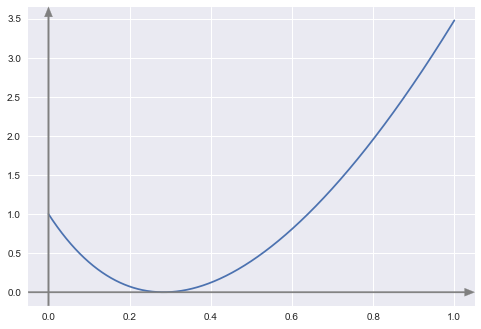

0.2835715603133143


a_n-1           a_n            f(a_n)     error_abs
n                                                             
1   0.2000000000  0.2404593190  1.8850350059e-02  0.0404593190
2   0.2404593190  0.2616704310  4.7881956011e-03  0.0212111121
3   0.2616704310  0.2725330924  1.2066746695e-03  0.0108626614
4   0.2725330924  0.2780301724  3.0288266025e-04  0.0054970800
5   0.2780301724  0.2807953335  7.5873081671e-05  0.0027651611
6   0.2807953335  0.2821820923  1.8987364016e-05  0.0013867587
7   0.2821820923  0.2828765191  4.7492302928e-06  0.0006944268
8   0.2828765191  0.2832239947  1.1876063958e-06  0.0003474756
9   0.2832239947  0.2833977981  2.9693896197e-07  0.0001738034
10  0.2833977981  0.2834847162  7.4239411452e-08  0.0000869181
11  0.2834847162  0.2835281793  1.8560436743e-08  0.0000434632
12  0.2835281793  0.2835499119  4.6401822940e-09  0.0000217326
13  0.2835499119  0.2835607785  1.1600546634e-09  0.0000108666
14  0.2835607785  0.2835662118  2.9001473445e-10  0.0000054333
15  0.2835662118  0.2835689285  7.2503947290e-11  0.0000027167
16  0.2835689285  0.2835702869  1.8126056212e-11  0.0000013583
17  0.2835702869  0.2835709660  4.5314307862e-12  0.0000006792
18  0.2835709660  0.2835713056  1.1328715743e-12  0.0000003396
19  0.2835713056  0.2835714754  2.8321789358e-13  0.0000001698
20  0.2835714754  0.2835715603  7.0776717820e-14  0.0000000849

In [18]:
def f(x):
    return 4*x**2 - 4*x*e**(-2*x) + e**(-4*x)
def df(x):
    return 8*x + 8*x*e**(-2*x) - 4*e**(-2*x) - 4*e**(-4*x)
graficar(f, 0, 1)
tabla , c_n = met_newton_rapshon(f, df, 0.2, 1e-7)
print(c_n)
tabla

#### Ejercicios de la cartilla
2. (c) Use el método de Newton para obtener una aproximación de las soluciones del siguente problema, con una precisión de $10^{-7}$.

$e^{-2} x^2 + 2 e^{-1} x == 1$, en $[-4,2]$

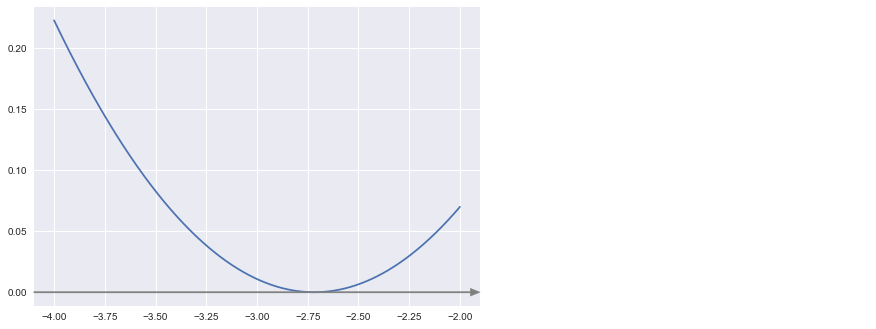

-2.71828189867074


a_n-1           a_n            f(a_n)     error_abs
n                                                             
1  -3.0000000000 -2.8591409142  2.6852255252e-03  0.1408590858
2  -2.8591409142 -2.7887113713  6.7130638130e-04  0.0704295429
3  -2.7887113713 -2.7534965999  1.6782659533e-04  0.0352147714
4  -2.7534965999 -2.7358892142  4.1956648831e-05  0.0176073857
5  -2.7358892142 -2.7270855213  1.0489162208e-05  0.0088036929
6  -2.7270855213 -2.7226836749  2.6222905516e-06  0.0044018464
7  -2.7226836749 -2.7204827517  6.5557263818e-07  0.0022009232
8  -2.7204827517 -2.7193822901  1.6389315971e-07  0.0011004616
9  -2.7193822901 -2.7188320593  4.0973289650e-08  0.0005502308
10 -2.7188320593 -2.7185569439  1.0243322635e-08  0.0002751154
11 -2.7185569439 -2.7184193862  2.5608304366e-09  0.0001375577
12 -2.7184193862 -2.7183506073  6.4020766466e-10  0.0000687788
13 -2.7183506073 -2.7183162179  1.6005174963e-10  0.0000343894
14 -2.7183162179 -2.7182990232  4.0012881897e-11  0.0000171947
15 -2.7182990232 -2.7182904259  1.0003331496e-11  0.0000085973
16 -2.7182904259 -2.7182861272  2.5008883853e-12  0.0000042987
17 -2.7182861272 -2.7182839778  6.2549965207e-13  0.0000021494
18 -2.7182839778 -2.7182829026  1.5609735726e-13  0.0000010752
19 -2.7182829026 -2.7182823657  3.8857805862e-14  0.0000005369
20 -2.7182823657 -2.7182820985  9.7699626167e-15  0.0000002672
21 -2.7182820985 -2.7182819648  2.4424906542e-15  0.0000001337
22 -2.7182819648 -2.7182818987  4.4408920985e-16  0.0000000662

In [19]:
def f(x):
    return e**(-2) * x**2 + 2*e**(-1) * x + 1
def df(x):
    return 2*e**(-2)*(x+e)
graficar(f, -4, -2)
tabla , c_n = met_newton_rapshon(f, df, -3, 1e-7)
print(c_n)
tabla

#### Ejercicios de la cartilla
2. (d) Use el método de Newton para obtener una aproximación de las soluciones del siguente problema, con una precisión de $10^{-7}$.

$f(x) = x^2 \cos^2(x) + \cos^2(x)-2x^3 \cos(x) -2x \cos(x) + x^4 +x^2$, en $[-1,1]$
$f'(x) = 2(x - \cos(x))(1+2x^2 - x \cos(x) + (1+x^2)\sin(x))$

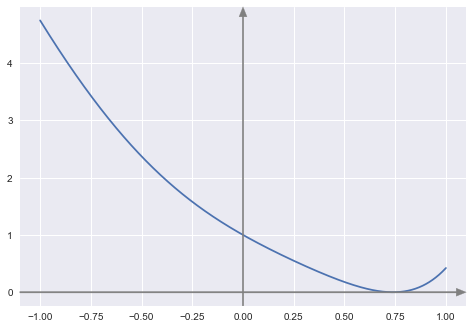

0.7390850336339961


a_n-1           a_n            f(a_n)     error_abs
n                                                             
1  -1.0000000000 -0.1707035647  1.3756787182e+00  0.8292964353
2  -0.1707035647  0.3949932151  3.2228705520e-01  0.5656967798
3   0.3949932151  0.6141936388  5.6779470220e-02  0.2192004237
4   0.6141936388  0.6825243965  1.2803369140e-02  0.0683307576
5   0.6825243965  0.7119650154  3.0670136320e-03  0.0294406189
6   0.7119650154  0.7257868078  7.5181603670e-04  0.0138217924
7   0.7257868078  0.7324983231  1.8618338147e-04  0.0067115152
8   0.7324983231  0.7358069557  4.6330143108e-05  0.0033086326
9   0.7358069557  0.7374498077  1.1555912856e-05  0.0016428520
10  0.7374498077  0.7382684059  2.8856712362e-06  0.0008185982
11  0.7382684059  0.7386770027  7.2100573145e-07  0.0004085969
12  0.7386770027  0.7388811262  1.8020000381e-07  0.0002041234
13  0.7388811262  0.7389831442  4.5043577201e-08  0.0001020181
14  0.7389831442  0.7390341424  1.1260091748e-08  0.0000509981
15  0.7390341424  0.7390596387  2.8149226283e-09  0.0000254963
16  0.7390596387  0.7390723862  7.0371797278e-10  0.0000127475
17  0.7390723862  0.7390787598  1.7592804991e-10  0.0000063736
18  0.7390787598  0.7390819465  4.3981707165e-11  0.0000031867
19  0.7390819465  0.7390835399  1.0995204747e-11  0.0000015934
20  0.7390835399  0.7390843365  2.7491342536e-12  0.0000007967
21  0.7390843365  0.7390847349  6.8722805224e-13  0.0000003984
22  0.7390847349  0.7390849341  1.7175150191e-13  0.0000001992
23  0.7390849341  0.7390850336  4.2743586448e-14  0.0000000996

In [20]:
#solución 1
def f(x):
    return x**2 * np.cos(x)**2 + np.cos(x)**2 - 2 * x**3 * np.cos(x) - 2 * x * np.cos(x) + x**4 + x**2
def df(x):
    return 2 * (x - np.cos(x)) * (1 + 2 * x**2 - x * np.cos(x) + (1 + x**2) * np.sin(x))
graficar(f, -1, 1)
tabla , c_n = met_newton_rapshon(f, df, -1, 1e-7)
print(c_n)
tabla

Este ejercicio tambien se puede solucionar simplificando la función:

$f(x) = x^2 \cos^2(x) + \cos^2(x)-2x^3 \cos(x) -2x \cos(x) + x^4 +x^2$
$f(x) = (x^2 +1)(\cos^2(x) - 2x\cos(x) + x^2)$
por tanto, una de las soluciones está dada por la función:

$g(x) = \cos^2(x) - 2x\cos(x) + x^2$
por tanto
$g'(x) = -2 \cos(x) \sin(x) - 2 \cos(x) + 2x \sin(x) +2x$

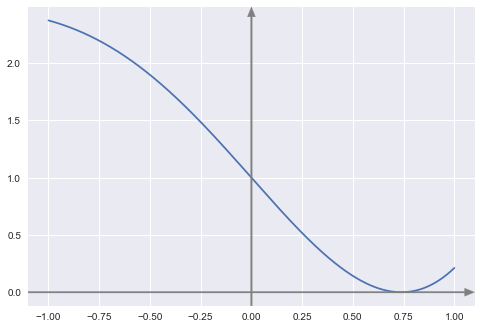

0.7390850827879775


a_n-1           a_n            f(a_n)     error_abs
n                                                             
1   0.0000000000  0.5000000000  1.4256859104e-01  0.5000000000
2   0.5000000000  0.6276112086  3.3058998569e-02  0.1276112086
3   0.6276112086  0.6848881310  8.0284624406e-03  0.0572769225
4   0.6848881310  0.7123297688  1.9812672692e-03  0.0274416377
5   0.7123297688  0.7257887252  4.9228215824e-04  0.0134589564
6   0.7257887252  0.7324567215  1.2270260419e-04  0.0066679964
7   0.7324567215  0.7357758118  3.0630346418e-05  0.0033190903
8   0.7357758118  0.7374316858  7.6519657332e-06  0.0016558740
9   0.7374316858  0.7382587119  1.9122914393e-06  0.0008270261
10  0.7382587119  0.7386719980  4.7798552327e-07  0.0004132861
11  0.7386719980  0.7388785845  1.1948547396e-07  0.0002065865
12  0.7388785845  0.7389818636  2.9870005802e-08  0.0001032791
13  0.7389818636  0.7390334996  7.4673311978e-09  0.0000516360
14  0.7390334996  0.7390593167  1.8668113722e-09  0.0000258171
15  0.7390593167  0.7390722250  4.6670034504e-10  0.0000129083
16  0.7390722250  0.7390786791  1.1667466993e-10  0.0000064541
17  0.7390786791  0.7390819062  2.9168778504e-11  0.0000032270
18  0.7390819062  0.7390835197  7.2920558480e-12  0.0000016135
19  0.7390835197  0.7390843265  1.8230972287e-12  0.0000008068
20  0.7390843265  0.7390847299  4.5585757391e-13  0.0000004034
21  0.7390847299  0.7390849316  1.1390888233e-13  0.0000002017
22  0.7390849316  0.7390850324  2.8421709430e-14  0.0000001009
23  0.7390850324  0.7390850828  6.9944050551e-15  0.0000000503

In [21]:
#solución 2
def g(x):
    return np.cos(x)**2 - 2 * x * np.cos(x) + x**2
def dg(x):
    return -2 * np.cos(x) * np.sin(x) - 2 * np.cos(x) + 2 * x * np.sin(x) + 2 * x
graficar(g, -1, 1)
tabla , c_n = met_newton_rapshon(g, dg, 0, 1e-7)
print(c_n)
tabla

### Ejercicio
Utilice el método de Newton-Rapshon para encontrar la raíz de $f(x) = e^{-0.5x} (4-x) - 2$

Utilice conjeturas iniciales de a) 2, b) 6 y c) 8.

Explique sus resultados.

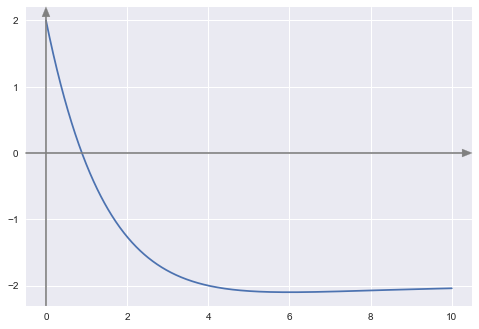

In [28]:
def f(x):
    return e**(-0.5*x) * (4 - x) -2
def df(x):
    return -0.5 * e**(-0.5*x) * (4 - x) - e**(-0.5*x)
graficar(f, 0, 10)

In [23]:
tabla , c_n = met_newton_rapshon(f, df, 2, 1e-10)
print(c_n)
tabla

0.885708802004777


a_n-1           a_n            f(a_n)         error_abs
n                                                                
1  2.0000000000  0.2817181715  1.2297431106e+00  1.7182818285e+00
2  0.2817181715  0.7768868450  1.8563037542e-01  4.9516867350e-01
3  0.7768868450  0.8817078789  6.5794683306e-03  1.0482103388e-01
4  0.8817078789  0.8857032412  9.1320299567e-06  3.9953622381e-03
5  0.8857032412  0.8857088020  1.7659651519e-11  5.5608273787e-06
6  0.8857088020  0.8857088020  4.4408920985e-16  1.0753620217e-11

In [24]:
tabla , c_n = met_newton_rapshon(f, df, 6, 1e-10)
print(c_n)
tabla

El metodo de falló.
None


In [26]:
tabla , c_n = met_newton_rapshon(f, df, 8, 1e-10)
print(c_n)
tabla

El metodo de falló.
None
